In [ ]:
! git clone https://github.com/pj35134/hackathon.git

Cloning into 'hackathon'...
remote: Enumerating objects: 2, done.
remote: Counting objects: 100% (2/2), done.
remote: Total 2302 (delta 0), reused 2 (delta 0), pack-reused 2300
Receiving objects: 100% (2302/2302), 1.31 GiB | 40.58 MiB/s, done.
Checking out files: 100% (2295/2295), done.


In [ ]:
import os
mainDIR = os.listdir('/content/hackathon/Data')
print(mainDIR)

['test', 'train']


In [ ]:
base_dir ='/content/hackathon/Data'
train_dir = os.path.join(base_dir,'train')
test_dir = os.path.join(base_dir,'test')

train_covid_dir = os.path.join(train_dir,'COVID19')
train_normal_dir = os.path.join(train_dir,'NORMAL')

test_covid_dir = os.path.join(test_dir,'COVID19')
test_normal_dir = os.path.join(test_dir,'NORMAL')


In [ ]:
covid_data_names = os.listdir(train_covid_dir)
print(covid_data_names[:10])
normal_data_names = os.listdir(train_normal_dir)
print(normal_data_names[:10])
test_covid_names =os.listdir(test_covid_dir)
print(test_covid_names[:10])
test_normal_names=os.listdir(test_normal_dir)
print(test_normal_names[:10])



['COVID19(11).jpg', 'COVID19(94).jpg', 'COVID19(167).jpg', 'COVID19(305).jpg', 'COVID19(300).jpg', 'COVID19(69).jpg', 'COVID19(349).jpg', 'COVID19(33).jpg', 'COVID19(422).jpg', 'COVID19(388).jpg']
['NORMAL(396).jpg', 'NORMAL(113).jpg', 'NORMAL(915).jpg', 'NORMAL(214).jpg', 'NORMAL(1404).jpg', 'NORMAL(519).jpg', 'NORMAL(79).jpg', 'NORMAL(806).jpg', 'NORMAL(447).jpg', 'NORMAL(208).jpg']
['COVID19(562).jpg', 'COVID-19 (875).jpg', 'COVID-19 (461).jpg', 'COVID-19 (353).jpg', 'COVID-19 (767).jpg', 'COVID-19 (831).jpg', 'COVID19(379).jpg', 'COVID19(499).jpg', 'COVID19(385).jpg', 'COVID-19 (871).jpg']
['NORMAL(498).jpg', 'NORMAL(471).jpg', 'NORMAL(1212).jpg', 'NORMAL(1423).jpg', 'NORMAL(565).jpg', 'NORMAL(500).jpg', 'NORMAL(1070).jpg', 'NORMAL(650).jpg', 'NORMAL(1023).jpg', 'NORMAL(1069).jpg']


In [ ]:
#get length of each train and test datasets
print("train dataset covid images:",len(covid_data_names))
print("train dataset normal images :",len(normal_data_names))
print("test dataset covid images:",len(test_covid_names))
print("test dataset normal image:",len(test_normal_names))


train dataset covid images: 545
train dataset normal images : 1266
test dataset covid images: 167
test dataset normal image: 317


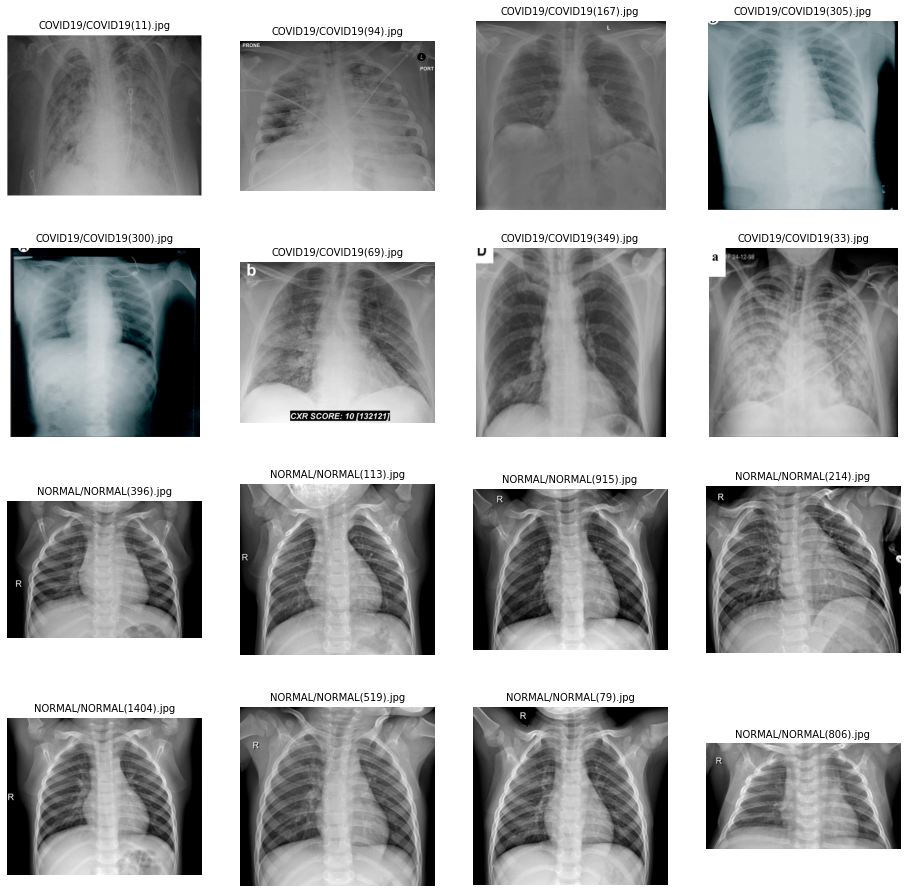

In [ ]:
#lets plot a grid of 16 images (8 images of Covid19 and 8 images of Normal) 
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
import random
nrows=4
ncols=4
pic_index=0
fig = plt.gcf()
fig.set_size_inches(ncols*4,nrows*4)
pic_index+=8

next_covid_pic = [os.path.join(train_covid_dir,fname)for fname in covid_data_names[pic_index-8:pic_index]]
next_normal_pic = [os.path.join(train_normal_dir,fname)for fname in normal_data_names[pic_index-8:pic_index]]

for i, img_path in enumerate(next_covid_pic+next_normal_pic):
  data = img_path.split('/',5)[5]
  sp = plt.subplot(nrows,ncols,i+1)
  sp.axis('Off')
  img = mpimg.imread(img_path)
  sp.set_title(data,fontsize=10)
  plt.imshow(img,cmap='gray')

plt.show()

Original Image Shape (1024, 1024, 3)


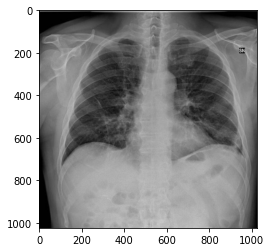

In [ ]:
# get the shape of image present in the dataset
import cv2
filePath = "/content/hackathon/Data/train/COVID19/COVID-19 (11).jpeg"
bgrimg = cv2.imread(str(filePath))
plt.imshow(bgrimg)
print('Original Image Shape',bgrimg.shape)

In [ ]:
from tensorflow.keras.layers import Dense, Input, Dropout,Flatten, Conv2D
from tensorflow.keras.layers import BatchNormalization, Activation, MaxPooling2D
from tensorflow.keras.models import Model, Sequential
from tensorflow.keras.optimizers import Adam

model = Sequential()
# add the convolutional layer
# filters, size of filters,input_shape,activation_function
model.add(Conv2D(32,(5,5),activation='relu',input_shape=(150,150,3)))
# pooling layer
model.add(MaxPooling2D(pool_size=(2,2)))
# place a dropout layer
model.add(Dropout(0.25))
# add another convolutional layer
model.add(Conv2D(64,(5,5),activation='relu'))
# pooling layer
model.add(MaxPooling2D(pool_size=(2,2)))
# Flatten the image to 1 dimensional array
model.add(Flatten())
# add a dense layer : amount of nodes, activation
model.add(Dense(256,activation='relu'))
# place a dropout layer
# 0.5 drop out rate is recommended, half input nodes will be dropped at each update
model.add(Dropout(0.5))
model.add(Dense(1, activation='sigmoid'))

opt = Adam(0.001)
model.compile(optimizer=opt, loss='binary_crossentropy', metrics=['accuracy'])
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d (Conv2D)              (None, 146, 146, 32)      2432      
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 73, 73, 32)        0         
_________________________________________________________________
dropout (Dropout)            (None, 73, 73, 32)        0         
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 69, 69, 64)        51264     
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 34, 34, 64)        0         
_________________________________________________________________
flatten (Flatten)            (None, 73984)             0         
_________________________________________________________________
dense (Dense)                (None, 256)               1

In [ ]:
#image augumentation
from tensorflow.keras.preprocessing.image import ImageDataGenerator
train_datagen = ImageDataGenerator(
    rescale=1./255,
    rotation_range=40,
    validation_split=0.2,
    zoom_range=0.2,
    horizontal_flip=True)

test_datagen = ImageDataGenerator(rescale=1./255)

validation_datagen = ImageDataGenerator(rescale=1./255)

#train and validation generator has been derived by splitting our dataset into (80% training data) & (20% validation data)

train_generator = train_datagen.flow_from_directory(train_dir,
                                                    target_size=(150,150),
                                                    subset='training',
                                                    batch_size=32,
                                                    class_mode='binary',
                                                    )


validation_generator = train_datagen.flow_from_directory(train_dir,
                                                     target_size=(150,150),
                                                    batch_size=32,
                                                     subset='validation',
                                                    class_mode='binary',
                                                    )


test_generator = test_datagen.flow_from_directory(test_dir,
                                                     target_size=(150,150),
                                                    batch_size=32,
                                                    class_mode='binary',
                                                    )

Found 1449 images belonging to 2 classes.
Found 362 images belonging to 2 classes.
Found 484 images belonging to 2 classes.


In [ ]:
#get the class label
train_generator.class_indices

{'COVID19': 0, 'NORMAL': 1}

In [ ]:
#get the shape of image
train_generator.image_shape

(150, 150, 3)

In [ ]:
#train the model
history = model.fit(
    x=train_generator,
    steps_per_epoch=45,
    epochs=30,
    validation_data = validation_generator,
    validation_steps = 10,
    verbose=1
)

Epoch 1/30
45/45 [==============================] - 44s 983ms/step - loss: 0.7238 - accuracy: 0.7713 - val_loss: 0.3505 - val_accuracy: 0.8781
Epoch 2/30
45/45 [==============================] - 45s 992ms/step - loss: 0.2639 - accuracy: 0.9090 - val_loss: 0.3220 - val_accuracy: 0.8750
Epoch 3/30
45/45 [==============================] - 44s 986ms/step - loss: 0.2619 - accuracy: 0.9195 - val_loss: 0.2177 - val_accuracy: 0.9281
Epoch 4/30
45/45 [==============================] - 45s 991ms/step - loss: 0.1770 - accuracy: 0.9457 - val_loss: 0.1539 - val_accuracy: 0.9469
Epoch 5/30
45/45 [==============================] - 45s 993ms/step - loss: 0.1293 - accuracy: 0.9598 - val_loss: 0.1729 - val_accuracy: 0.9406
Epoch 6/30
45/45 [==============================] - 44s 989ms/step - loss: 0.1154 - accuracy: 0.9598 - val_loss: 0.1291 - val_accuracy: 0.9500
Epoch 7/30
45/45 [==============================] - 44s 987ms/step - loss: 0.1257 - accuracy: 0.9577 - val_loss: 0.1239 - val_accuracy: 0.9500

Text(0.5, 0, 'epochs')

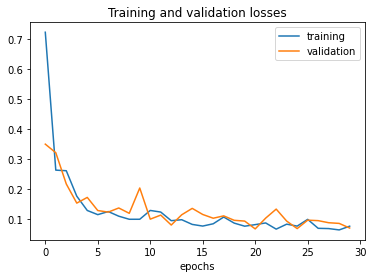

In [ ]:
#graph between training and validation loss
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.legend(['training','validation'])
plt.title('Training and validation losses')
plt.xlabel('epochs')

Text(0.5, 0, 'epochs')

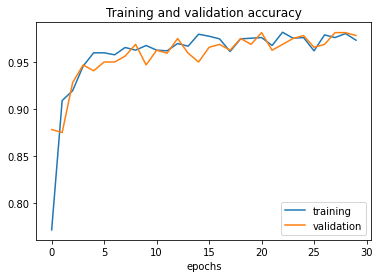

In [ ]:
#graph between training and valdiation accuracy
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.legend(['training','validation'])
plt.title('Training and validation accuracy')
plt.xlabel('epochs')

In [ ]:
#accuracy for test data
test_loss, test_acc = model.evaluate_generator(test_generator)
print('test acc:{} test loss:{}'.format(test_acc,test_loss))

test acc:0.9648760557174683 test loss:0.09177735447883606


In [ ]:
#save the model
model.save('model.h5')

In [ ]:
from google.colab import files
files.download('model.h5') 

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

In [ ]:
#test your model with some images from your local computer to predict whether a patient is affected by COVID19 or not.
import numpy as np
from google.colab import files
from keras.preprocessing import image

uploaded = files.upload()
for fn in uploaded.keys():
  path='/content/'+fn
  print(path)
  img = image.load_img(path , target_size=(150,150))
  x = image.img_to_array(img)
  x=np.expand_dims(x,axis=0)
  images = np.vstack([x])
  classes = model.predict(images,batch_size=10)
  print(fn)
  if classes==0:
    print('Covid19')
  else:
    print('Normal')


Using TensorFlow backend.


Saving normalxray.jpeg to normalxray.jpeg
Saving NORMAL2-IM-1436-0001.jpeg to NORMAL2-IM-1436-0001.jpeg
Saving normal.jpeg to normal.jpeg
Saving covidxray.jpeg to covidxray.jpeg
Saving covid.jpeg to covid.jpeg
/content/normalxray.jpeg
normalxray.jpeg
Normal
/content/NORMAL2-IM-1436-0001.jpeg
NORMAL2-IM-1436-0001.jpeg
Normal
/content/normal.jpeg
normal.jpeg
Normal
/content/covidxray.jpeg
covidxray.jpeg
Covid19
/content/covid.jpeg
covid.jpeg
Covid19
